In [1]:
import numpy
import matplotlib
from matplotlib import pyplot
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from matplotlib.patches import ConnectionPatch, Rectangle
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from mpl_toolkits.mplot3d.art3d import PolyCollection
from scipy import integrate
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib.text import Annotation


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

/Users/ih3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams['font.size'] = 16

In [4]:
v = 1
t_end = 0.2
x = numpy.linspace(0, 1, 1000)
t = numpy.linspace(0, t_end, 1000)

q0 = numpy.sin(2 * numpy.pi * x)
q1_advection = numpy.sin(2 * numpy.pi * (x - v * t_end))
q1_burgers = numpy.where(x < 0.5, x, x - 1) # Not true; is it enough for illustration?
char_x_t0 = numpy.linspace(-1, 1, 41)
char_x_t1_advection = char_x_t0 + v * t_end
char_x_t1_burgers = char_x_t0 + numpy.sin(2 * numpy.pi * char_x_t0) * t_end

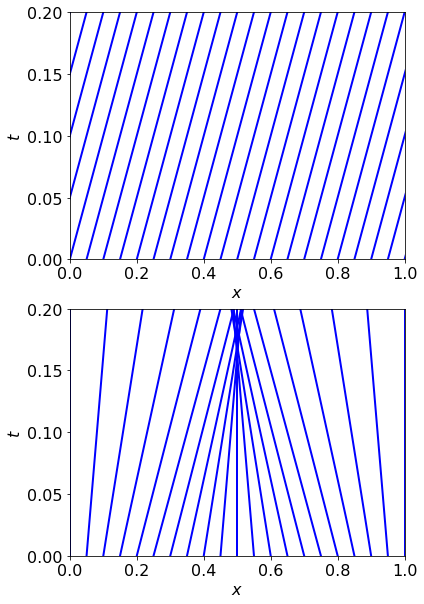

In [5]:
fig, axes = pyplot.subplots(2, 1, figsize=(6, 10))
for i in range(len(char_x_t0)):
    axes[0].plot([char_x_t0[i], char_x_t1_advection[i]], [0, t_end], lw=2, color='b')
    axes[1].plot([char_x_t0[i], char_x_t1_burgers[i]], [0, t_end], lw=2, color='b')
for ax in axes:
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, t_end)

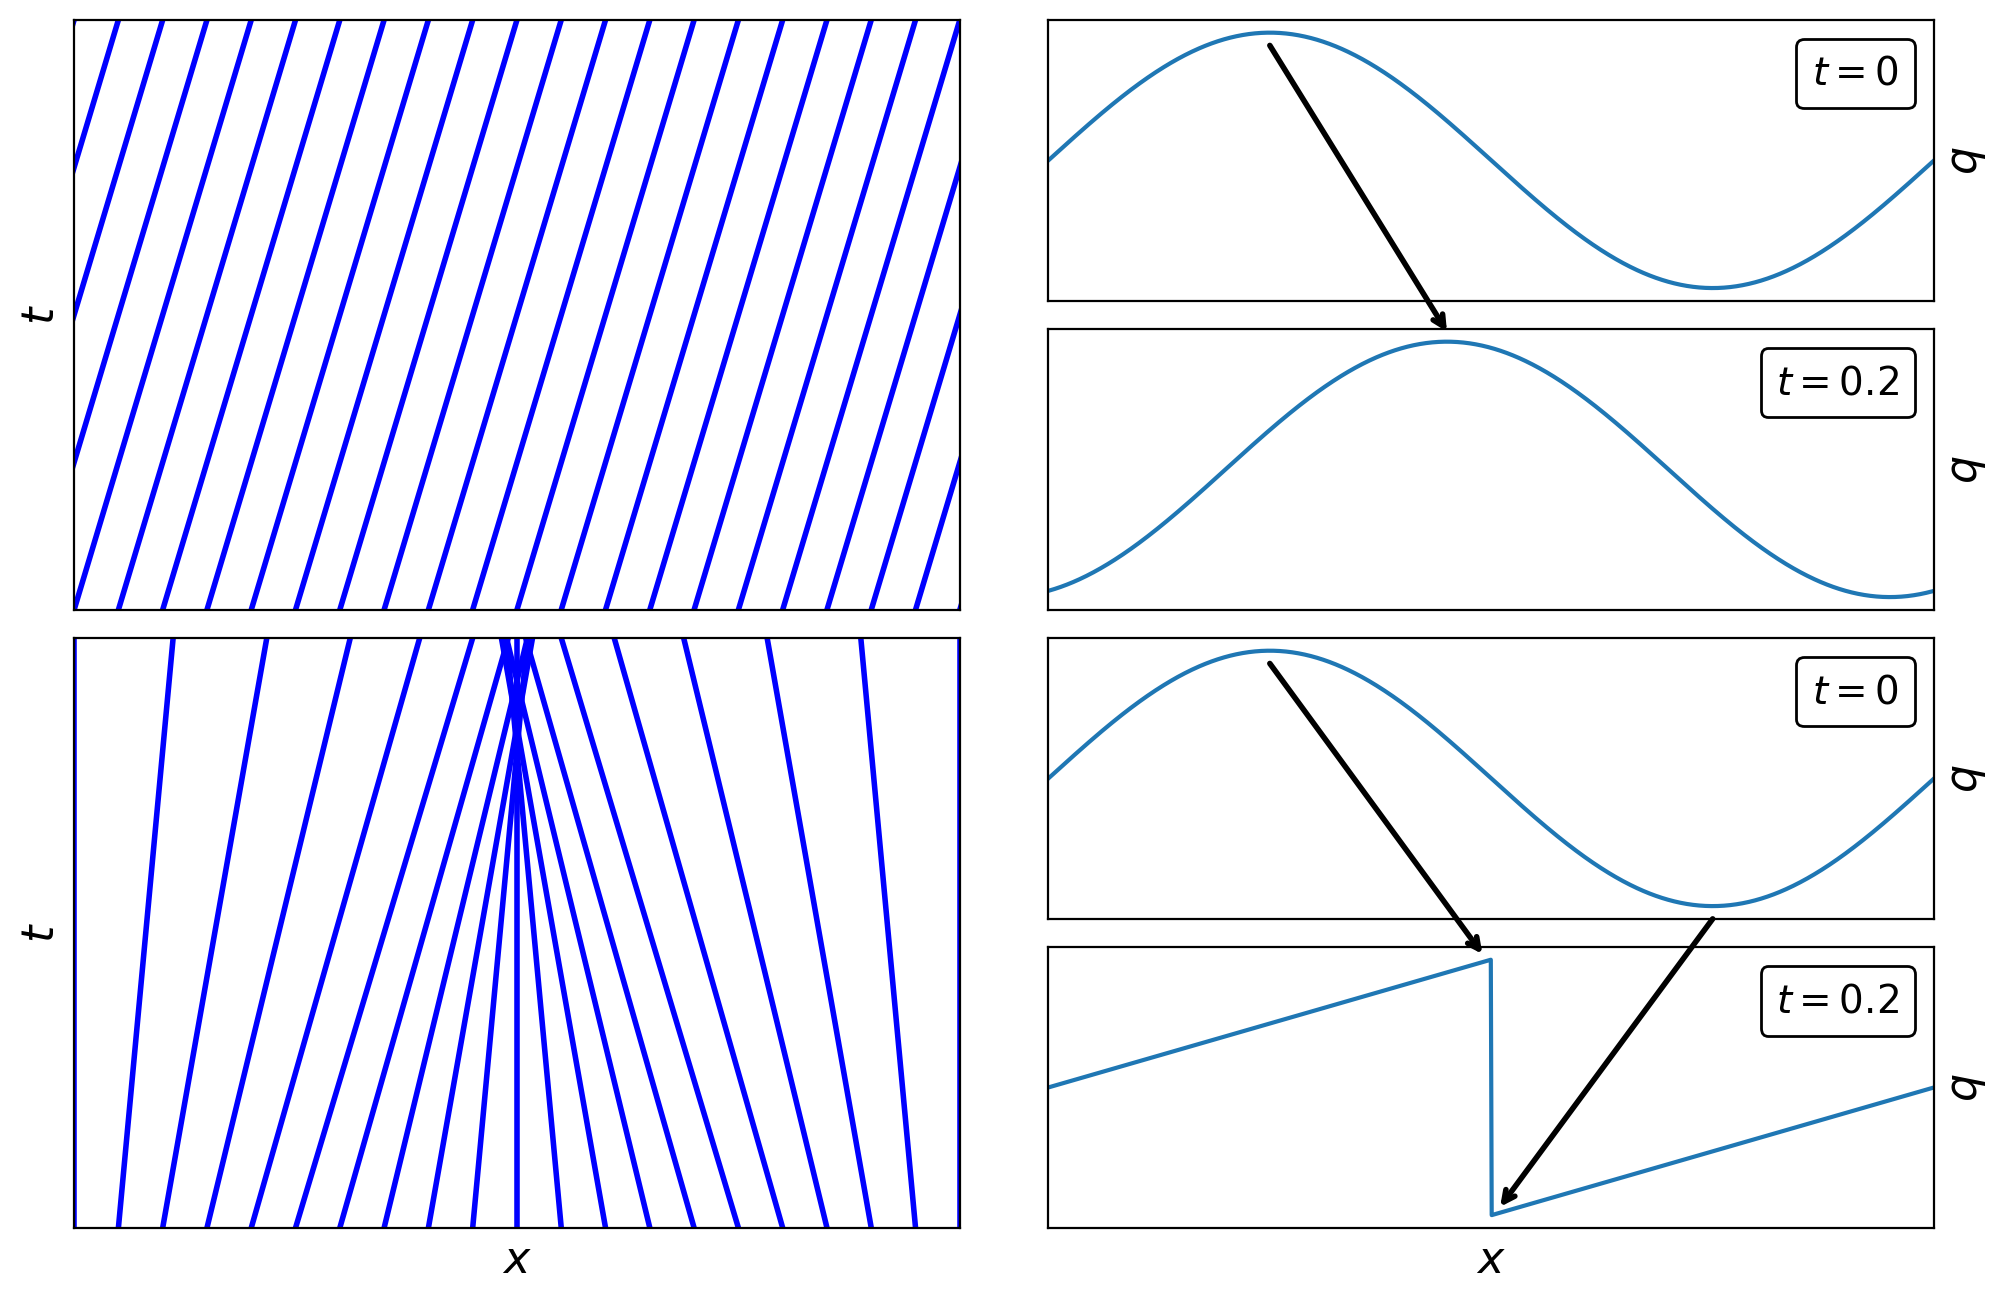

In [6]:
widths = [1, 1]
heights = [1, 1, 1, 1]
fig = pyplot.figure(constrained_layout=False, figsize=(12, 8), dpi=200)
gs = fig.add_gridspec(4, 2, width_ratios=widths, height_ratios=heights,
                      hspace=0.1, wspace=0.1)
# fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.01, hspace=0.01, wspace=0.01)

ax_char = [fig.add_subplot(gs[:2, 0]), fig.add_subplot(gs[2:, 0])]
for i in range(len(char_x_t0)):
    ax_char[0].plot([char_x_t0[i], char_x_t1_advection[i]], [0, t_end], lw=2, color='b')
    ax_char[1].plot([char_x_t0[i], char_x_t1_burgers[i]], [0, t_end], lw=2, color='b')
for i, ax in enumerate(ax_char):
    if i == 1:
        ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, t_end)
    ax.set_xticks([])
    ax.set_yticks([])

axes = []
for i in range(4):
    axes.append(fig.add_subplot(gs[i, 1]))

axes[0].plot(x, q0)
axes[1].plot(x, q1_advection)
axes[2].plot(x, q0)
axes[3].plot(x, q1_burgers)
for i, ax in enumerate(axes):
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r"$q$")
    ax.yaxis.set_label_position("right")
    if i == 3:
        ax.set_xlabel(r"$x$")
    if i in [0, 2]:
        at = AnchoredText(r"$t=0$",
                          prop=dict(size=14), frameon=True,
                          loc=1,
                          )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
    else:
        at = AnchoredText(rf"$t={t_end}$",
                          prop=dict(size=14), frameon=True,
                          loc=1,
                          )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        if i==1:
            conn = ConnectionPatch(xyA=(0.45, 0.98*max(ax.get_ylim())),
                                   xyB=(0.25, 0.9),
                                   coordsA='data', coordsB='data',
                                   axesA=ax, axesB=axes[i-1],
                                   arrowstyle='<-', lw=2)
            ax.add_artist(conn)
        else:
            conn = ConnectionPatch(xyA=(0.49, 0.95*max(ax.get_ylim())),
                                   xyB=(0.25, 0.9),
                                   coordsA='data', coordsB='data',
                                   axesA=ax, axesB=axes[i-1],
                                   arrowstyle='<-', lw=2)
            ax.add_artist(conn)
            conn = ConnectionPatch(xyA=(0.51, 0.85*min(ax.get_ylim())),
                                   xyB=(0.75, -1.1),
                                   coordsA='data', coordsB='data',
                                   axesA=ax, axesB=axes[i-1],
                                   arrowstyle='<-', lw=2)
            ax.add_artist(conn)
# pyplot.savefig("characteristics.png", bbox_inches="tight")

In [7]:
textsize=30
pyplot.rcParams.update({'font.size': textsize})

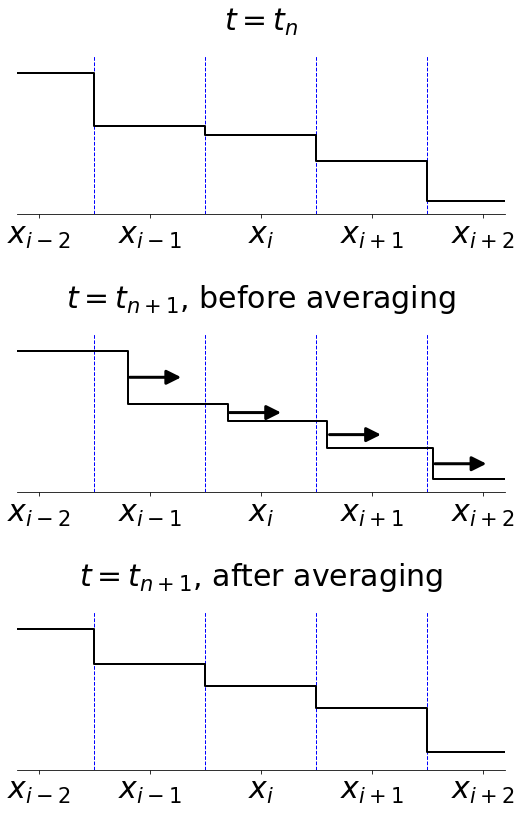

In [36]:
fig, axes = pyplot.subplots(3, 1, figsize=(8, 12))
for ax in axes:
#     ax.spines['left'].set_position(('data', 0))
#     ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(numpy.arange(-2, 2+0.01, 1))
    ax.set_yticks([])
    ax.set_xticklabels([r"$x_{i-2}$", r"$x_{i-1}$", r"$x_{i}$", r"$x_{i+1}$", r"$x_{i+2}$", ], size=textsize)
    ax.set_yticklabels([])

for num in numpy.arange(-3, 4, 2):
    axes[0].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[0].plot([-2.5, -1.5, -1.5, -0.5, -0.5, 0.5, 0.5, 1.5, 1.5, 2.5],
             [0.8, 0.8, 0.5, 0.5, 0.45, 0.45, 0.3, 0.3, 0.075, 0.075],
             'k-', lw=2)
# axes[1].set_xlabel(r"$x$", size=textsize)
axes[0].set_xlim(-2.2, 2.2)
axes[0].set_ylim(0, 1)


for num in numpy.arange(-3, 4, 2):
    axes[1].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[1].plot([-2.5, -1.2, -1.2, -0.3, -0.3, 0.6, 0.6, 1.55, 1.55, 2.5],
             [0.8, 0.8, 0.5, 0.5, 0.4, 0.4, 0.25, 0.25, 0.075, 0.075],
             'k-', lw=2)
axes[1].annotate("", xy=[-1.2, 0.65], xytext=[-0.7, 0.65],
            horizontalalignment='center', verticalalignment='center',
            arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
            size=textsize)
axes[1].annotate("", xy=[-0.3, 0.45], xytext=[0.2, 0.45],
            horizontalalignment='center', verticalalignment='center',
            arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
            size=textsize)
axes[1].annotate("", xy=[0.6, 0.325], xytext=[1.1, 0.325],
            horizontalalignment='center', verticalalignment='center',
            arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
            size=textsize)
axes[1].annotate("", xy=[1.55, 0.16], xytext=[2.05, 0.16],
            horizontalalignment='center', verticalalignment='center',
            arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
            size=textsize)
# axes[2].set_xlabel(r"$x$", size=textsize)
axes[1].set_xlim(-2.2, 2.2)
axes[1].set_ylim(0, 1)


for num in numpy.arange(-3, 4, 2):
    axes[2].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[2].plot([-2.5, -1.5, -1.5, -0.5, -0.5, 0.5, 0.5, 1.5, 1.5, 2.5],
             [0.8, 0.8, 0.6, 0.6, 0.475, 0.475, 0.35, 0.35, 0.1, 0.1],
             'k-', lw=2)
# axes[3].set_xlabel(r"$x$", size=textsize)
axes[2].set_xlim(-2.2, 2.2)
axes[2].set_ylim(0, 1)

axes[0].set_title(r"$t=t_{n}$", size=textsize)
axes[1].set_title(r"$t=t_{n+1}$, before averaging", size=textsize)
axes[2].set_title(r"$t=t_{n+1}$, after averaging", size=textsize)
fig.tight_layout()

# fig.savefig('08_godunov.png', bbox_inches='tight')

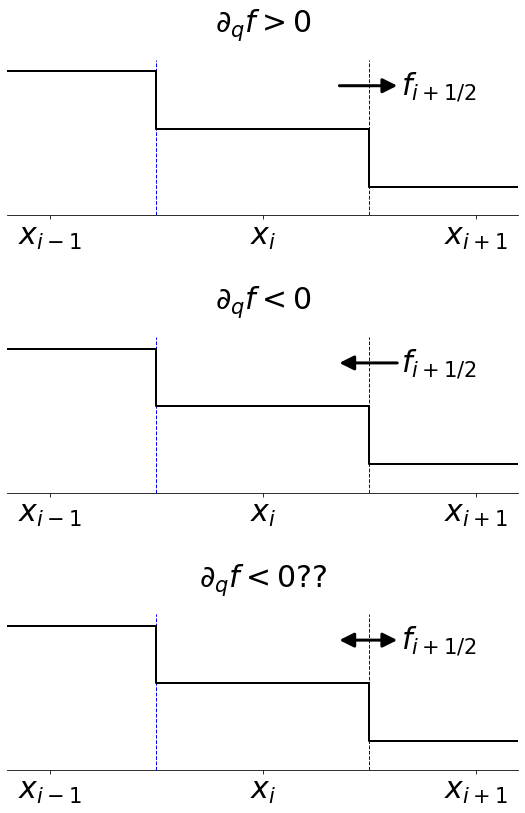

In [47]:
fig, axes = pyplot.subplots(3, 1, figsize=(8, 12))
for ax in axes:
#     ax.spines['left'].set_position(('data', 0))
#     ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(numpy.arange(-1, 1+0.01, 1))
    ax.set_yticks([])
    ax.set_xticklabels([r"$x_{i-1}$", r"$x_{i}$", r"$x_{i+1}$", ], size=textsize)
    ax.set_yticklabels([])

for num in numpy.arange(-2, 3, 2):
    axes[0].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[0].plot([-1.5, -0.5, -0.5, 0.5, 0.5, 1.5],
             [0.5, 0.5, 0.3, 0.3, 0.1, 0.1],
             'k-', lw=2)
axes[0].annotate(r"$f_{i+1/2}$", xy=[0.35, 0.45], xytext=[0.65, 0.45],
                verticalalignment='center',
                arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
                size=textsize)
axes[0].set_xlim(-1.2, 1.2)
axes[0].set_ylim(0, 0.6)


for num in numpy.arange(-2, 3, 2):
    axes[1].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[1].plot([-1.5, -0.5, -0.5, 0.5, 0.5, 1.5],
             [0.5, 0.5, 0.3, 0.3, 0.1, 0.1],
             'k-', lw=2)
axes[1].annotate(r"$f_{i+1/2}$", xy=[0.35, 0.45], xytext=[0.65, 0.45],
                verticalalignment='center',
                arrowprops=dict(arrowstyle='-|>', color='k', ls='-', lw=3),
                size=textsize)
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(0, 0.6)


for num in numpy.arange(-2, 3, 2):
    axes[2].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[2].plot([-1.5, -0.5, -0.5, 0.5, 0.5, 1.5],
             [0.5, 0.5, 0.3, 0.3, 0.1, 0.1],
             'k-', lw=2)
axes[2].annotate(r"$f_{i+1/2}$", xy=[0.35, 0.45], xytext=[0.65, 0.45],
                verticalalignment='center',
                arrowprops=dict(arrowstyle='<|-|>', color='k', ls='-', lw=3),
                size=textsize)
axes[2].set_xlim(-1.2, 1.2)
axes[2].set_ylim(0, 0.6)

axes[0].set_title(r"$\partial_q f > 0$", size=textsize)
axes[1].set_title(r"$\partial_q f < 0$", size=textsize)
axes[2].set_title(r"$\partial_q f < 0$??", size=textsize)
fig.tight_layout()

fig.savefig('godunov_flux.png', bbox_inches='tight')

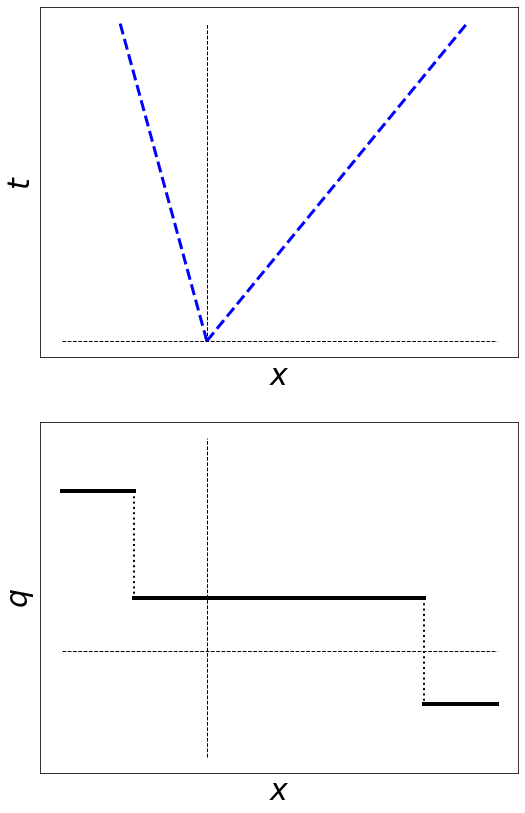

In [35]:
# HLLE

xi_m = -0.1
xi_p = 0.3
q_l = 0.3
q_r = -0.1
y_max = 0.4
y_min = -0.2
dy = y_max - y_min
x_min = -0.1
x_max = 0.2
t_end = 0.5
f = lambda q: q**2 / 2
q_star = (xi_p * q_r - xi_m * q_l - f(q_r) + f(q_l)) / (xi_p - xi_m)
fig, axes = pyplot.subplots(2, 1, figsize=(8, 12))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].plot([x_min, x_max], [y_min, y_min], 'k--', lw=1)
axes[0].plot([0, 0], [y_min, y_max], 'k--', lw=1)
axes[0].plot([0, xi_m * dy], [y_min, y_max], 'b--', lw=3)
axes[0].plot([0, xi_p * dy], [y_min, y_max], 'b--', lw=3)
axes[0].set_xlabel(r"$x$")
axes[0].set_ylabel(r"$t$")
axes[1].plot([x_min, x_max], [0, 0], 'k--', lw=1)
axes[1].plot([0, 0], [y_min, y_max], 'k--', lw=1)
axes[1].plot([x_min, xi_m * t_end], [q_l, q_l], 'k-', lw=4)
axes[1].plot([xi_m * t_end, xi_m * t_end], [q_l, q_star], 'k:', lw=2)
axes[1].plot([xi_m * t_end, xi_p * t_end], [q_star, q_star], 'k-', lw=4)
axes[1].plot([xi_p * t_end, xi_p * t_end], [q_star, q_r], 'k:', lw=2)
axes[1].plot([xi_p * t_end, x_max], [q_r, q_r], 'k-', lw=4)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel(r"$x$")
axes[1].set_ylabel(r"$q$")
fig.tight_layout()
fig.savefig('hlle.png', bbox_inches='tight')

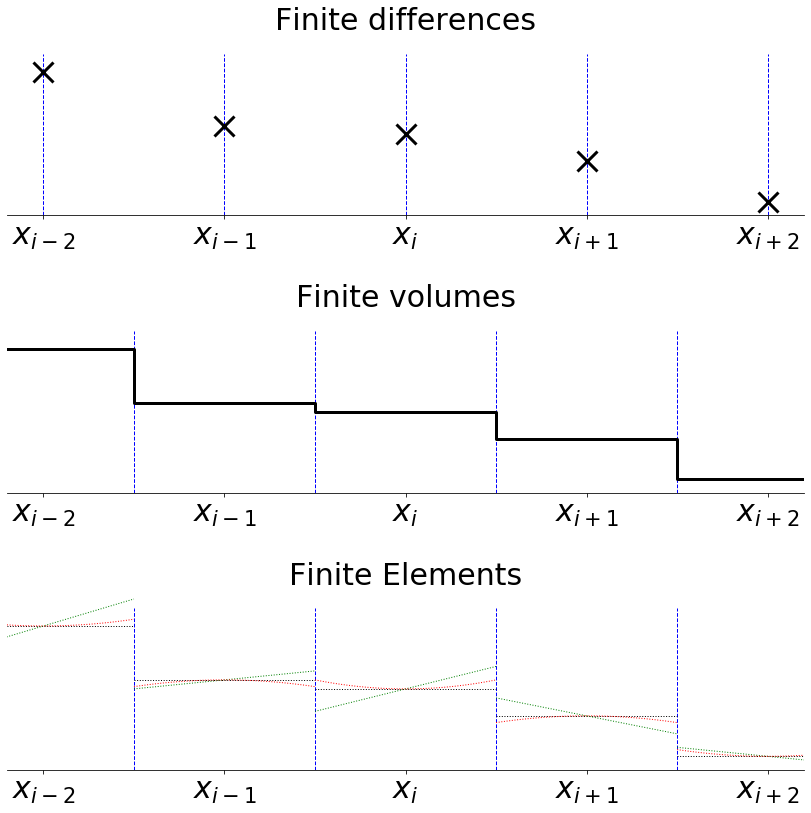

In [59]:
# Grids

fig, axes = pyplot.subplots(3, 1, figsize=(12, 12))
for ax in axes:
#     ax.spines['left'].set_position(('data', 0))
#     ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(numpy.arange(-2, 2+0.01, 1))
    ax.set_yticks([])
    ax.set_xticklabels([r"$x_{i-2}$", r"$x_{i-1}$", r"$x_{i}$", r"$x_{i+1}$", r"$x_{i+2}$", ], size=textsize)
    ax.set_yticklabels([])

for num in numpy.arange(-4, 5, 2):
    axes[0].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[0].plot([-2, -1, 0, 1, 2],
             [0.8, 0.5, 0.45, 0.3, 0.075],
             'kx', lw=2, ms=20, mew=3)
# axes[1].set_xlabel(r"$x$", size=textsize)
axes[0].set_xlim(-2.2, 2.2)
axes[0].set_ylim(0, 1)


for num in numpy.arange(-3, 4, 2):
    axes[1].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[1].plot([-2.5, -1.5, -1.5, -0.5, -0.5, 0.5, 0.5, 1.5, 1.5, 2.5],
             [0.8, 0.8, 0.5, 0.5, 0.45, 0.45, 0.3, 0.3, 0.075, 0.075],
             'k-', lw=3)
# axes[1].set_xlabel(r"$x$", size=textsize)
axes[1].set_xlim(-2.2, 2.2)
axes[1].set_ylim(0, 1)


values = [0.8, 0.5, 0.45, 0.3, 0.075]
slopes = [0.3, 0.1, 0.25, -0.2, -0.1]
curves = [0.15, -0.15, 0.2, -0.15, 0.15]
for i, num in enumerate(numpy.arange(-3, 6, 2)):
    axes[2].axvline(x=num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
    x_cell = numpy.linspace(num/2-1, num/2)
    x_centre = num/2-0.5
    axes[2].plot(x_cell, values[i] * numpy.ones_like(x_cell), 'k:', lw=1)
    axes[2].plot(x_cell, values[i] * numpy.ones_like(x_cell) + slopes[i] * (x_cell - x_centre), 'g:', lw=1)
    axes[2].plot(x_cell, values[i] * numpy.ones_like(x_cell) + curves[i] * (x_cell - x_centre)**2, 'r:', lw=1)
# axes[1].set_xlabel(r"$x$", size=textsize)
axes[2].set_xlim(-2.2, 2.2)
axes[2].set_ylim(0, 1)



axes[0].set_title(r"Finite differences", size=textsize)
axes[1].set_title(r"Finite volumes", size=textsize)
axes[2].set_title(r"Finite Elements", size=textsize)
fig.tight_layout()

fig.savefig('fd_fv_fe_grids.png', bbox_inches='tight')

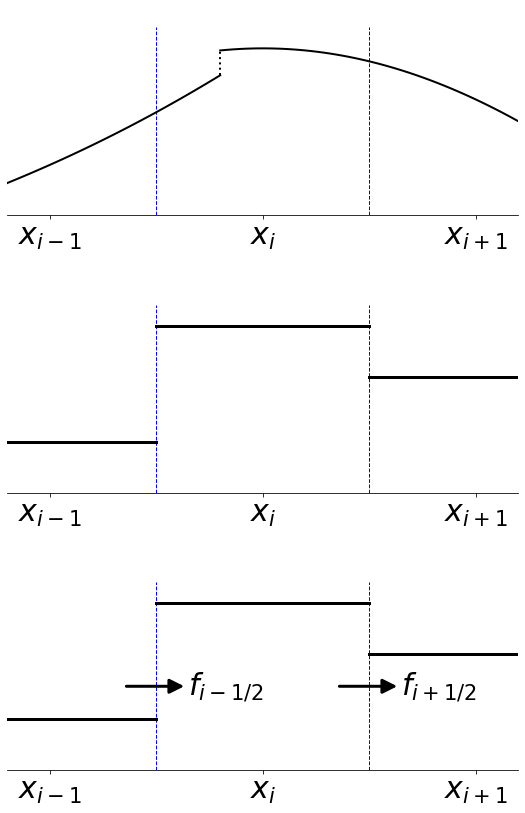

In [69]:
# Fluxes, telescoping
fig, axes = pyplot.subplots(3, 1, figsize=(8, 12))
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(numpy.arange(-1, 1+0.01, 1))
    ax.set_yticks([])
    ax.set_xticklabels([r"$x_{i-1}$", r"$x_{i}$", r"$x_{i+1}$", ], size=textsize)
    ax.set_yticklabels([])

f = lambda x: numpy.where(x < -0.2,
                          numpy.exp(numpy.sin(x/3)),
                          numpy.cos(x/2))    

for num in numpy.arange(-2, 3, 2):
    axes[0].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
x_left = numpy.linspace(-1.2, -0.2-1e-8)
x_right = numpy.linspace(-0.2+1e-8, 1.2)
axes[0].plot(x_left, f(x_left), 'k-', lw=2)
axes[0].plot(x_right, f(x_right), 'k-', lw=2)
axes[0].plot([-0.2, -0.2], [f(x_left[-1]), f(x_right[0])], 'k:', lw=2)
axes[0].set_xlim(-1.2, 1.2)
axes[0].set_ylim(0.6, 1.1)


for num in numpy.arange(-2, 3, 2):
    axes[1].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[1].plot([-1.5, -0.5],
             f(numpy.array([-1, -1])),
             'k-', lw=3)
axes[1].plot([-0.5, 0.5],
             f(numpy.array([0, 0])),
             'k-', lw=3)
axes[1].plot([0.5, 1.5],
             f(numpy.array([1, 1])),
             'k-', lw=3)
# axes[1].annotate(r"$f_{i+1/2}$", xy=[0.35, 0.45], xytext=[0.65, 0.45],
#                 verticalalignment='center',
#                 arrowprops=dict(arrowstyle='-|>', color='k', ls='-', lw=3),
#                 size=textsize)
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(0.6, 1.1)


for num in numpy.arange(-2, 3, 2):
    axes[2].axvline(x=0.5+num/2, ymin=0, ymax=0.9, color='b', ls='--', lw=1)
axes[2].plot([-1.5, -0.5],
             f(numpy.array([-1, -1])),
             'k-', lw=3)
axes[2].plot([-0.5, 0.5],
             f(numpy.array([0, 0])),
             'k-', lw=3)
axes[2].plot([0.5, 1.5],
             f(numpy.array([1, 1])),
             'k-', lw=3)
axes[2].annotate(r"$f_{i-1/2}$", xy=[-0.65, 0.8], xytext=[-0.35, 0.8],
                verticalalignment='center',
                arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
                size=textsize)
axes[2].annotate(r"$f_{i+1/2}$", xy=[0.35, 0.8], xytext=[0.65, 0.8],
                verticalalignment='center',
                arrowprops=dict(arrowstyle='<|-', color='k', ls='-', lw=3),
                size=textsize)
axes[2].set_xlim(-1.2, 1.2)
axes[2].set_ylim(0.6, 1.1)

fig.tight_layout()

fig.savefig('weak_solutions1.png', bbox_inches='tight')

array([0.72094336, 0.72094336, 1.        , 1.        , 0.87758256,
       0.87758256])